# Database visualization

In [1]:
import numpy as np
import sqlite3 as lite
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import os
import sys

from utils.db_utils import get_db_absolute_path
from database.queries import QUERY_FULL_RANK_TEST_GROUPED_A
from plots.plot_functions import plot_best_additive_noise_methods, plot_all_of_an_additive_noise, plot_all_of_denoising, plot_epoch_comparison

## Compare Additive noise methods

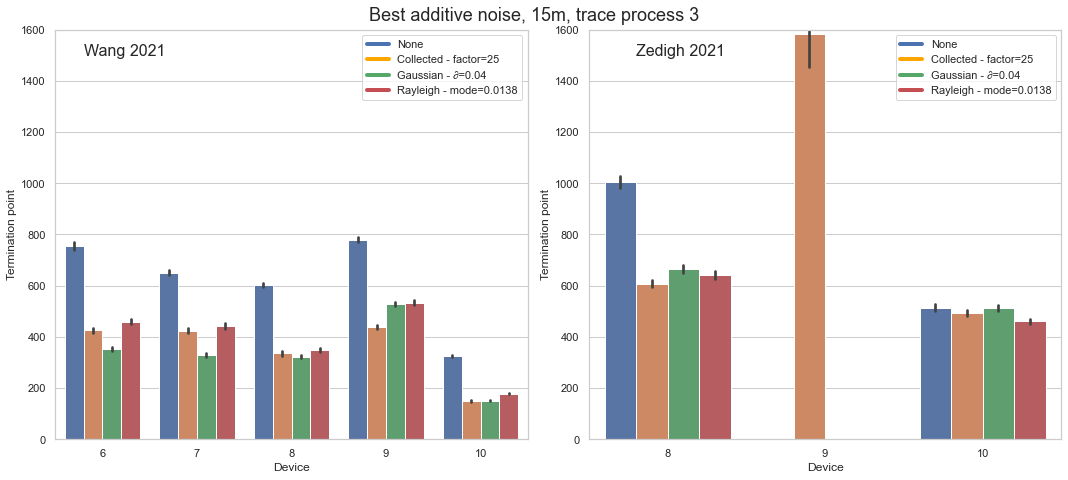

In [12]:
wang, zedigh = plot_best_additive_noise_methods(collected_value=25)

## Gaussians - epoch 65, distance 15

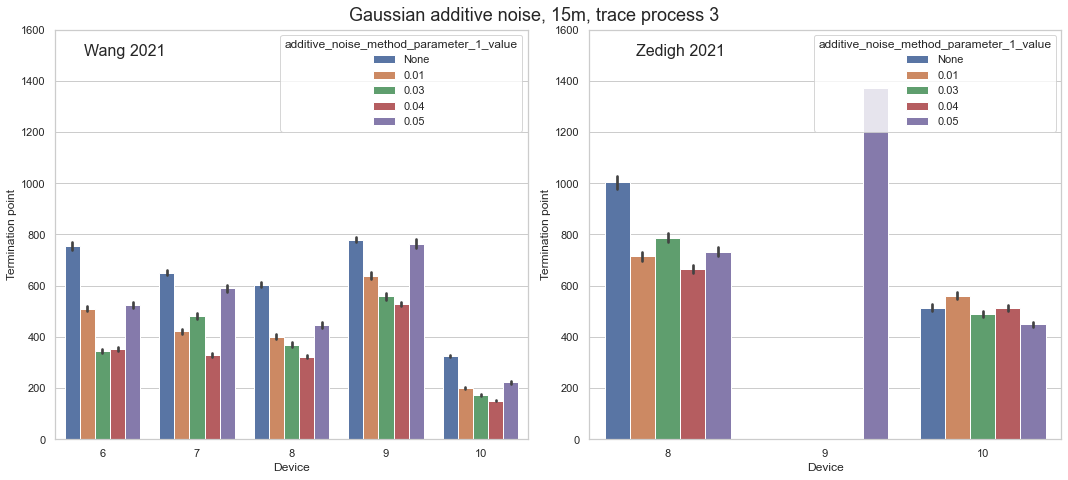

In [13]:
_, __ = plot_all_of_an_additive_noise(additive_noise_method="Gaussian", distance=15)

## Collected noise

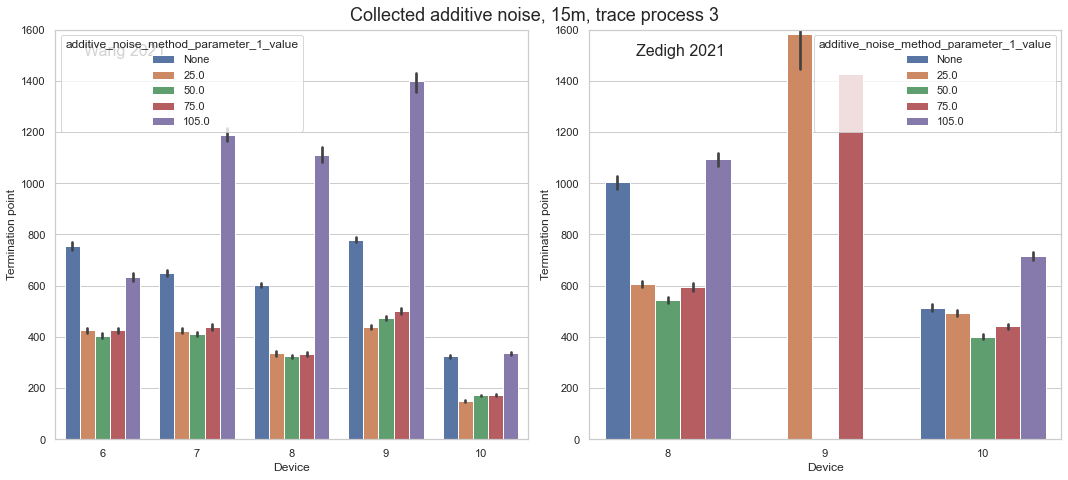

In [4]:
_, __ = plot_all_of_an_additive_noise(additive_noise_method="Collected", distance=15)

## Rayleigh Noise

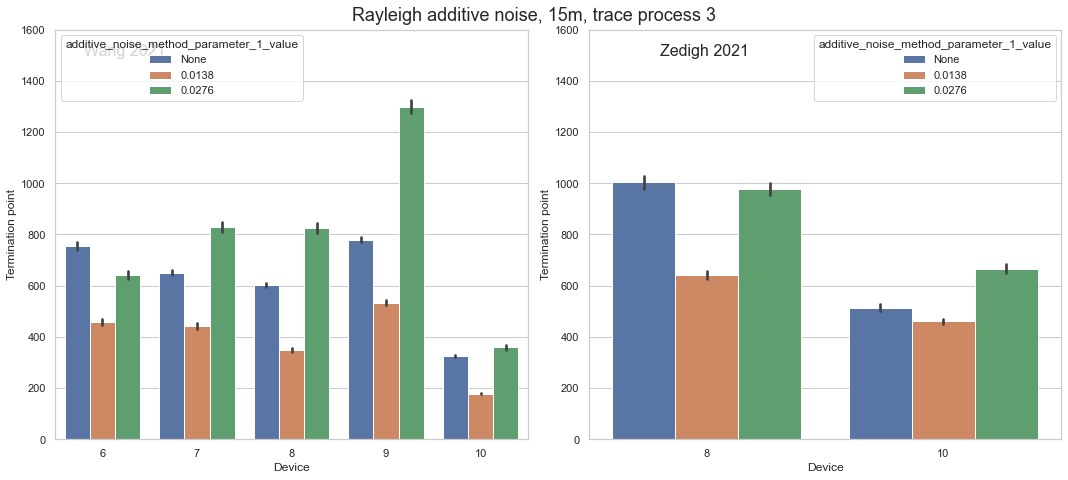

In [5]:
_, __ = plot_all_of_an_additive_noise(additive_noise_method="Rayleigh", distance=15)

## Denoising - Moving Average filter

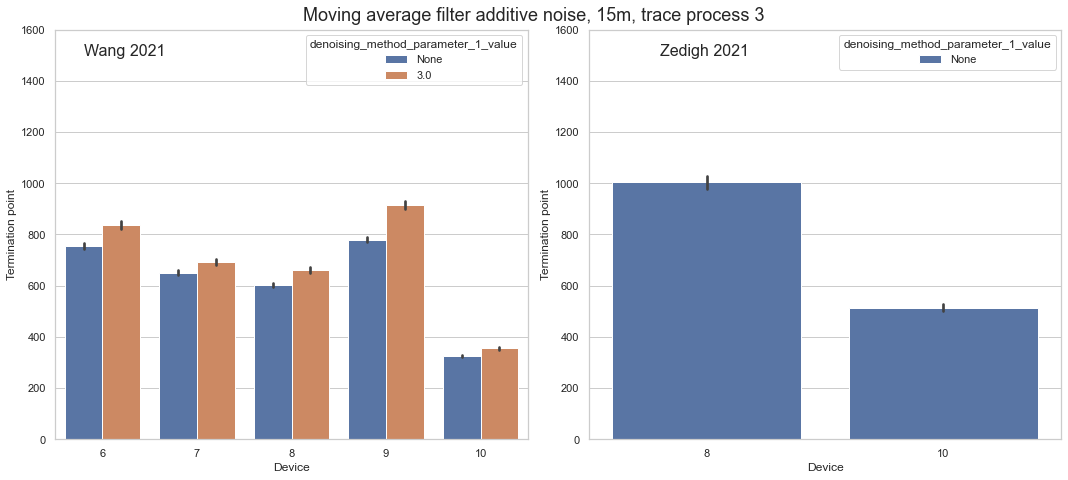

In [3]:
_, __ = plot_all_of_denoising()

## Epoch analysis

### Epoch - Collected 50

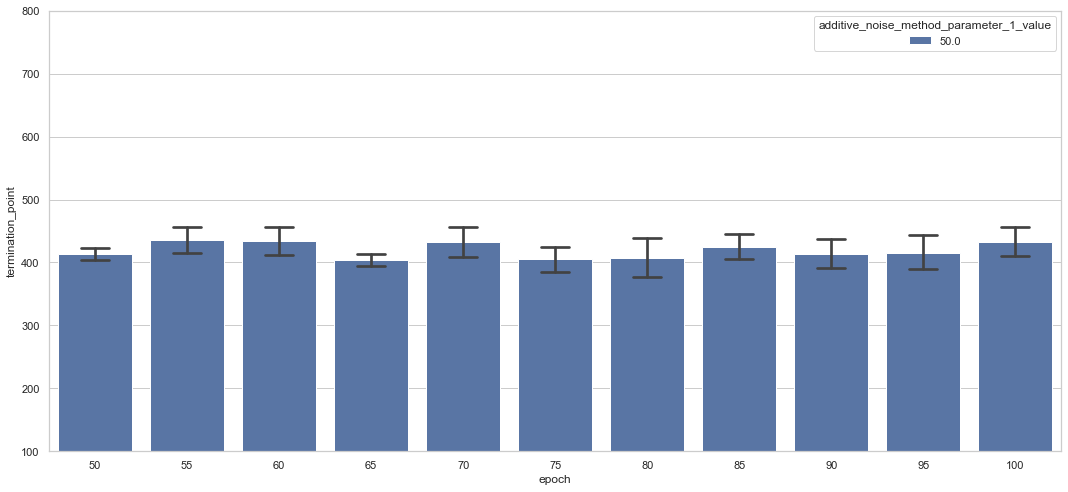

In [14]:
_ = plot_epoch_comparison(test_dataset="Wang_2021", device=6, distance=15, additive_noise_method="Collected", additive_noise_method_parameter_1_value=50)

### Epoch - Rayleigh 0.0138

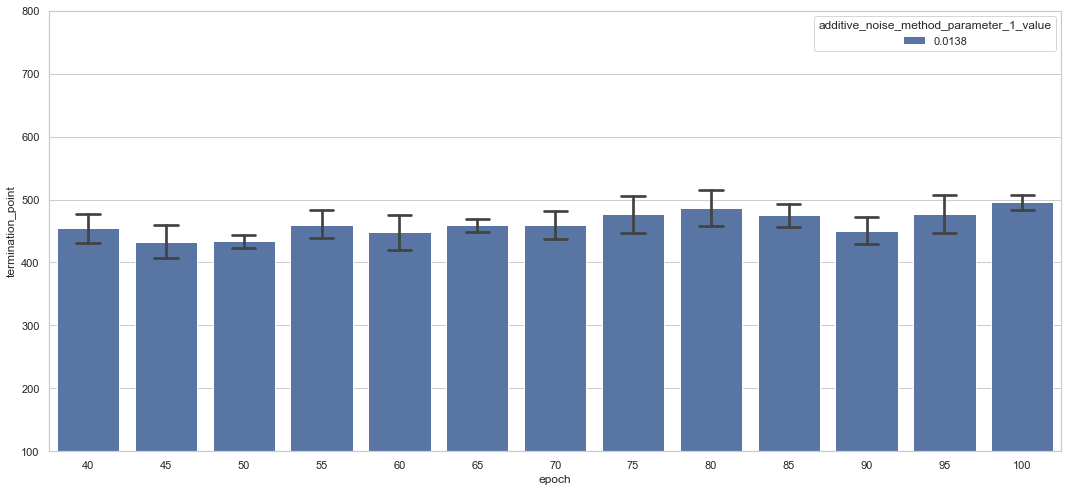

In [15]:
_ = plot_epoch_comparison(test_dataset="Wang_2021", device=6, distance=15, additive_noise_method="Rayleigh", additive_noise_method_parameter_1_value=0.0138)

## Epoch - Gaussian 0.04

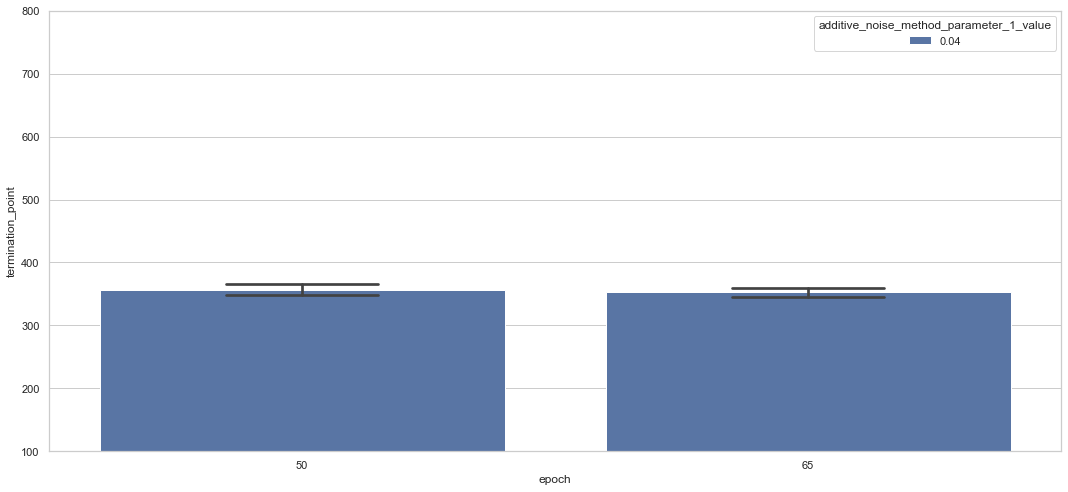

In [16]:
_ = plot_epoch_comparison(test_dataset="Wang_2021", device=6, distance=15, additive_noise_method="Gaussian", additive_noise_method_parameter_1_value=0.04)

## Comparision between methods, distance and device non-specific

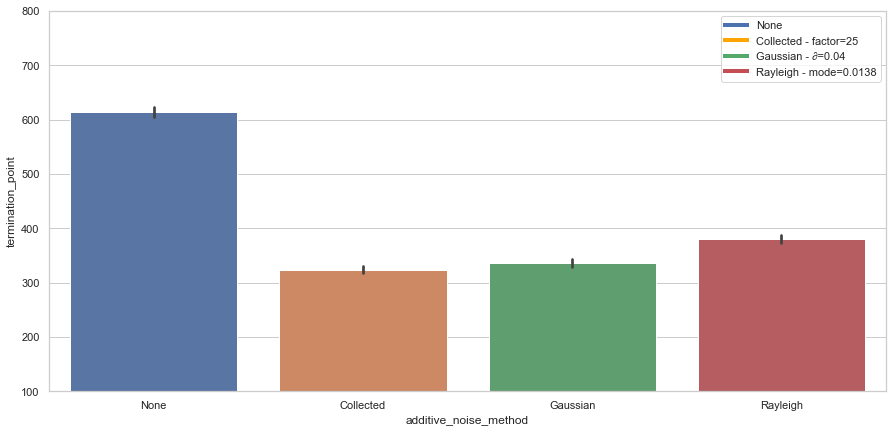

In [18]:
query = """
select
    device, 
    epoch, 
    additive_noise_method,
    additive_noise_method_parameter_1, 
    additive_noise_method_parameter_1_value, 
    additive_noise_method_parameter_2, 
    additive_noise_method_parameter_2_value, 
    termination_point
from
    full_rank_test
where
    epoch = 65 
    AND denoising_method IS NULL
    AND (
        additive_noise_method_parameter_1_value = 0.04
        OR additive_noise_method_parameter_1_value IS NULL
        OR additive_noise_method_parameter_1_value = 25
        OR additive_noise_method_parameter_1_value = 0.0138
    )
order by
    additive_noise_method
    ;
"""
full_rank_test = pd.read_sql_query(query, con)
full_rank_test.fillna("None",inplace=True)
ylim_bottom = 100
ylim_top = 800
#labels = ["None", "Collected - factor=25", "Gaussian - ∂=0.04", "Rayleigh - mode=0.0138"]
sns.set(rc={"figure.figsize":(15, 7)})
sns.set_style("whitegrid")
sns.barplot(x=full_rank_test["additive_noise_method"], y=full_rank_test["termination_point"])
plt.ylim(ylim_bottom,ylim_top)
#plt.tight_layout()
plt.legend(custom_lines, labels)
plt.savefig("../docs/figs/Additive_noise_comparison_ALL.png")
plt.show()